<a href="https://colab.research.google.com/github/ferreirabruno7/Text_analyze/blob/master/Desafio_Lets_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio Lets Code

Bruno Ferreira da Paixão

**Crimes em São Francisco**

In [1]:
#acessar google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [79]:
#importação de bibliotecas 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
crimes = pd.read_csv("/content/drive/My Drive/Colab Notebooks/54f2b05b-1fe0-44f9-ae75-5e84fb3da81f.csv", delimiter = '|', encoding='utf-8')
crimes.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,periodo,resolucao
0,160002869,ASSAULT,BATTERY,Friday,01/01/2016 12:00:00 AM,21:35,NORTHERN,NONE,1700 Block of BUSH ST,-122.426077,37.788019,"(37.788018555829, -122.426077177375)",16000286904134,noite,outro
1,160086863,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Friday,01/29/2016 12:00:00 AM,22:30,TARAVAL,NONE,1200 Block of 19TH AV,-122.477377,37.764478,"(37.7644781578695, -122.477376524003)",16008686306240,noite,outro
2,140776777,ASSAULT,AGGRAVATED ASSAULT WITH A GUN,Thursday,09/15/2016 12:00:00 AM,07:40,INGLESIDE,"ARREST, BOOKED",SILVER AV / CAMELLIA AV,-122.432326,37.729271,"(37.7292705199592, -122.432325871028)",14077677704011,manha,preso
3,160004558,ASSAULT,BATTERY WITH SERIOUS INJURIES,Saturday,01/02/2016 12:00:00 AM,16:40,MISSION,NONE,VALENCIA ST / 26TH ST,-122.420355,37.748906,"(37.7489063051829, -122.420354780861)",16000455804136,tarde,outro
4,160004655,ASSAULT,BATTERY,Saturday,01/02/2016 12:00:00 AM,17:05,INGLESIDE,NONE,900 Block of GENEVA AV,-122.439910,37.715765,"(37.715765426995, -122.439909766772)",16000465504134,tarde,outro


In [6]:
#instalar pandas profilling
!pip install -U pandas-profiling

     |████████████████████████████████| 245kB 11.6MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
     |████████████████████████████████| 1.1MB 19.7MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 3.2MB 40.7MB/s 
     |████████████████████████████████| 296kB 48.6MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=0f7f361343ee3934f75cab965a9aeeb9efdb8d118aa2d8894cf128c02300780d
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=d7ab3340fb8ddf20982466f6b09aab34073b9386e604adf22507c2d3a94cf21c
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but 

In [7]:
from pandas_profiling import ProfileReport

In [8]:
profile = ProfileReport(crimes, title='Crimes em São Franscisco - Resumo  Base', html={'style':{'full_width' : True}})

In [9]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

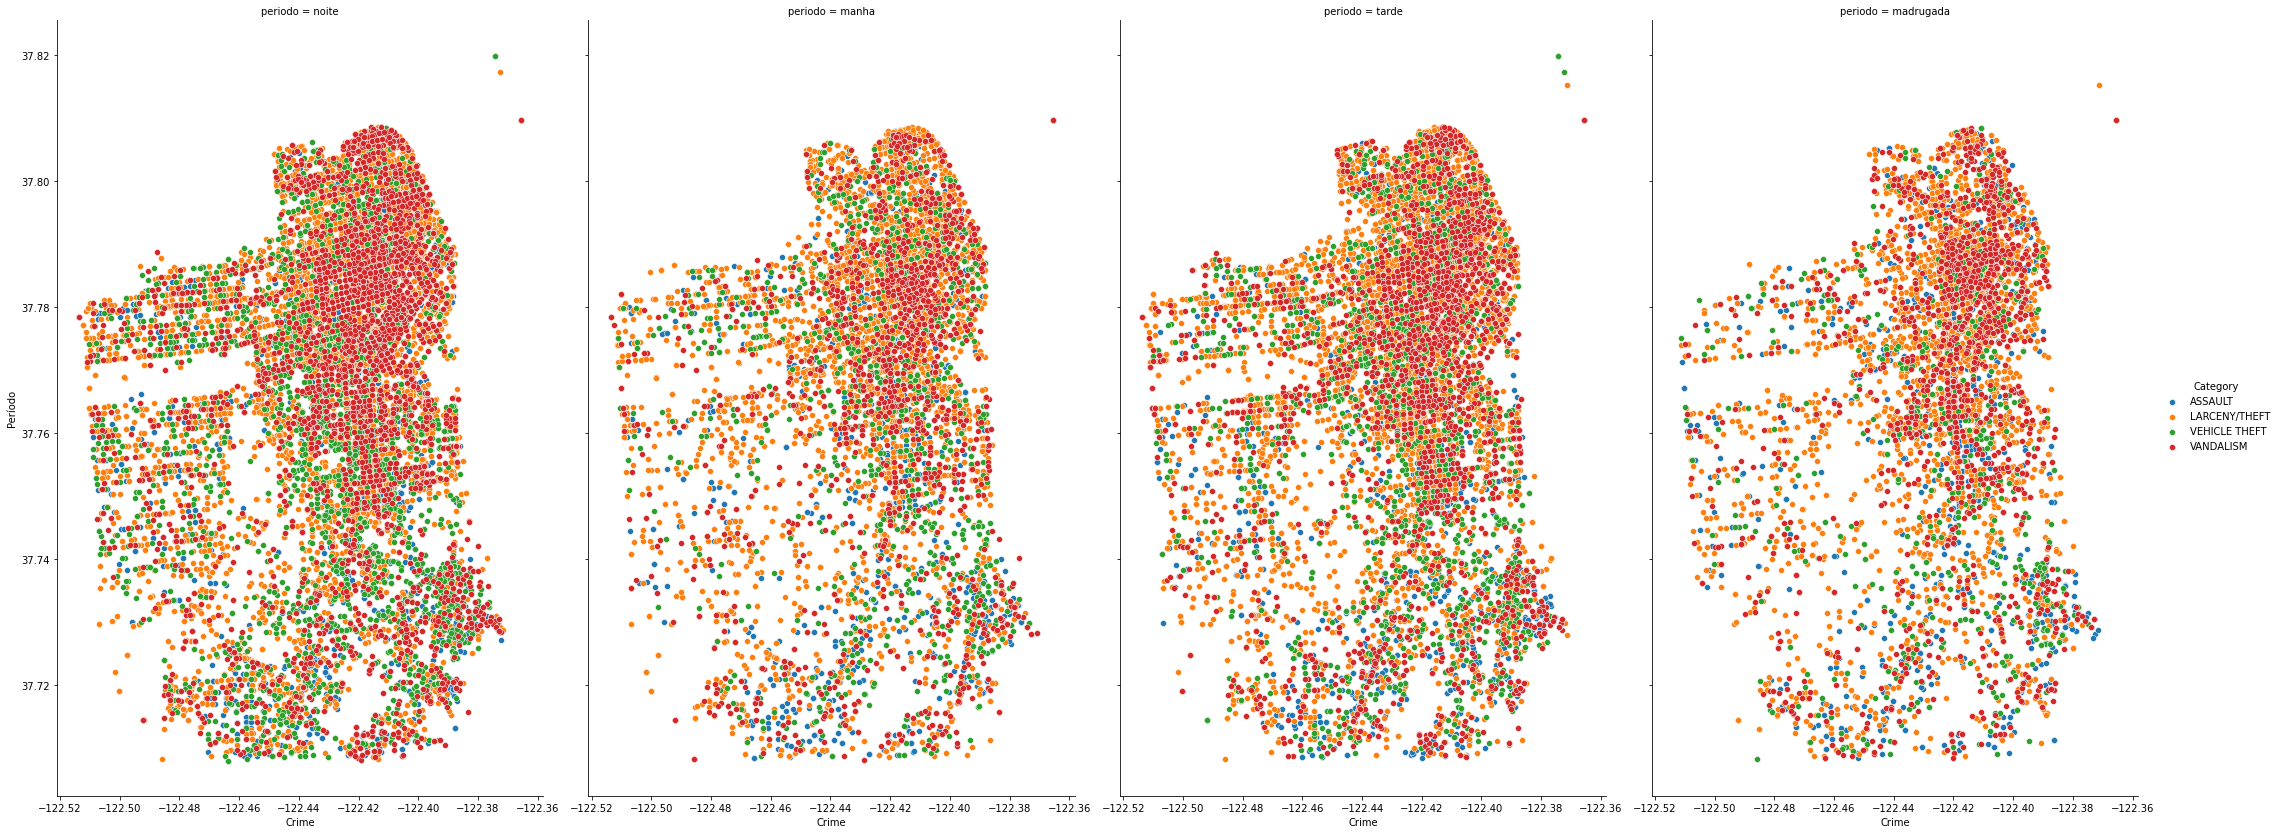

In [37]:
#visualização de crimes
g = sns.FacetGrid(crimes, col="periodo", hue="Category", height=11.5, aspect=.65)
g.map_dataframe(sns.scatterplot, x="X", y="Y")
g.set_axis_labels("Crime", "Período")
g.add_legend()

**Regressão Linear - 35 pts**

In [39]:
regressao = pd.read_csv("/content/drive/My Drive/Colab Notebooks/3fbeab8b-1b87-4f2b-9c9d-c6d2b5f02564.csv", delimiter = ',', encoding='utf-8')
regressao.head()

,EXPL_0,EXPL_1,EXPL_2,EXPL_3,EXPL_4,EXPL_5,EXPL_6,EXPL_7,EXPL_8,EXPL_9,EXPL_10,EXPL_11,EXPL_12,EXPL_13,EXPL_14,EXPL_15,EXPL_16,EXPL_17,EXPL_18,EXPL_19,EXPL_20,EXPL_21,EXPL_22,EXPL_23,EXPL_24,RESP
0,-0.516612,-0.911046,-1.310863,0.198417,2.178032,0.809620,0.114453,0.017736,-0.597042,1.815517,-0.894091,1.813832,-0.655406,-1.166513,0.522693,0.826580,-0.143587,0.476833,-0.802338,0.272534,1.994768,-0.219452,1.076083,-1.664473,-0.295681,271.214983
1,1.575351,0.799166,1.713601,0.868442,0.499717,0.647438,-0.135092,-0.284663,-0.120399,-0.027060,-1.216633,-0.083220,-0.128559,0.804702,-1.390827,-0.966445,-1.463615,-1.284817,0.820637,-1.160558,-0.508827,-1.368782,0.824532,0.904665,-0.326862,-142.054307
2,0.643848,0.133967,-1.277565,1.011164,1.262008,0.933945,0.247755,-0.940966,0.334855,-0.440096,-1.106314,-0.403338,-0.121420,-0.846686,-1.389024,-0.181706,0.495279,-0.948654,0.948349,0.558893,0.350821,2.165832,0.607784,-0.403427,-0.107814,2.574030
3,-0.779519,1.226722,-0.202538,0.638357,-0.254927,-0.694636,-0.072524,-0.102900,-1.094016,0.687462,-0.215831,-1.940731,-0.058426,-1.038645,-0.226684,-0.340486,-1.372905,-1.885550,0.471528,-0.268754,-1.832324,-0.082042,-0.359472,-0.305451,0.738930,-106.937832
4,-0.083908,0.069170,-0.401373,-0.761437,1.900349,0.401358,-1.058474,-1.242542,-1.743173,-0.772286,-0.738163,-0.750177,0.321003,-0.060812,-1.240197,-1.426459,-1.284766,0.058901,0.649206,0.328945,-0.185247,0.354517,-0.329587,-0.618624,0.439020,22.277815


In [69]:
#importação de biblioteca de sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

In [42]:
y = regressao['RESP']

In [43]:
x = regressao[['EXPL_0', 'EXPL_1', 'EXPL_2', 'EXPL_3', 'EXPL_4' ,'EXPL_5', 'EXPL_6', 'EXPL_7', 'EXPL_8', 'EXPL_9', 'EXPL_10', 'EXPL_11', 'EXPL_12', 'EXPL_13', 'EXPL_14', 'EXPL_15', 'EXPL_16', 'EXPL_17', 'EXPL_18', 'EXPL_19', 'EXPL_21', 'EXPL_22', 'EXPL_23', 'EXPL_24']]

In [84]:
#divisão treino teste
X_train, X_test, y_tran, y_test = train_test_split(x,y, test_size=0.33, random_state=1)

In [85]:
X_train

,EXPL_0,EXPL_1,EXPL_2,EXPL_3,EXPL_4,EXPL_5,EXPL_6,EXPL_7,EXPL_8,EXPL_9,EXPL_10,EXPL_11,EXPL_12,EXPL_13,EXPL_14,EXPL_15,EXPL_16,EXPL_17,EXPL_18,EXPL_19,EXPL_21,EXPL_22,EXPL_23,EXPL_24
261,-0.757164,0.359687,1.084643,-1.757700,0.186430,0.772046,0.313092,0.364357,-0.887191,-0.735397,-0.202753,1.191189,0.686346,-1.416750,0.255178,-1.182332,0.203044,-0.070384,0.711288,-0.785719,0.658618,-0.680263,-0.942766,-0.497569
127,-0.606713,-1.324470,-1.220725,1.346979,-0.404087,-0.468737,0.975912,0.225500,0.403474,1.008212,0.729376,-0.152060,0.327584,0.246637,0.338064,-1.566726,-1.375920,-0.257735,1.846091,-1.012567,0.354498,-0.033318,-1.555101,0.337737
82,0.954339,-0.739779,-1.457351,-0.178085,-2.131140,-0.033889,2.540514,0.246920,1.106484,-0.491671,-0.044476,0.079862,-0.039224,1.138010,0.237581,1.154109,2.279148,0.444621,-0.358365,-0.082706,1.614191,0.558892,1.519595,1.896404
458,-0.191972,-0.201371,-0.903555,-0.591488,-0.216040,1.427701,0.244248,1.640216,-1.381103,-0.538293,-0.416221,0.176035,-0.929172,0.504305,-1.413783,-0.876721,-0.603887,-0.970957,-0.107718,0.249274,-0.401074,0.620097,-0.358057,-1.918482
268,1.140744,-0.307845,-0.791499,-0.783183,0.331875,0.065858,0.341293,0.286352,1.355855,-1.482877,-0.465240,-0.460628,0.227629,-0.800503,1.920601,-0.919949,0.744159,-0.936490,0.162299,0.548871,-0.352805,-1.112614,-0.326449,-1.108631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.502550,-0.676415,-0.120341,0.544330,-0.497455,-0.135176,-0.293611,1.386703,0.701429,-0.753750,0.612337,0.022186,1.129084,1.328019,-0.356424,1.077845,2.556970,1.306732,0.063000,0.600355,1.020117,1.011410,-1.228424,-1.555623
72,0.030021,0.303189,-0.975104,-1.176372,0.293464,2.414557,1.669518,-1.070560,-0.131139,0.494750,1.964403,0.312013,-0.187741,-0.569109,-0.134423,0.429707,-0.293031,-0.123556,-0.145318,-0.186995,0.407401,-0.912614,-1.109057,2.154348
396,-0.233092,1.754886,1.069316,0.314272,0.029683,-0.772709,0.468439,-1.495644,0.807237,-0.798063,1.069393,0.890706,0.794863,0.199524,-2.123100,1.294085,1.743712,1.162204,1.417299,-0.831155,-1.326265,-1.198301,1.038788,-1.097203
235,-0.114234,-0.292504,0.623446,-2.240627,1.027448,-1.887527,-0.799129,-0.442635,2.145151,-0.100208,0.284068,0.131569,-1.345940,-0.958864,-0.692508,0.444832,-0.410411,-0.456539,-2.749194,0.371559,1.051416,0.727210,1.962565,-0.139554


In [86]:
#instância do modelo
lm = LinearRegression()

In [87]:
#treino
lm.fit(X_train, y_tran)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
#intercep
print(lm.intercept_)

0.0


In [89]:
#coefcientes
print(lm.coef_)

[ 5.39408460e-14  5.10930428e-01  6.18324045e+00  8.18101344e-14
  3.94212364e+01  4.08555995e-14 -3.65623408e-14 -7.71125378e+01
  4.38308905e-14  6.96112067e+01  9.26287424e+01  5.32097907e+01
 -3.09645108e-14  3.45446096e-14  4.73555334e-14 -2.42466257e+01
  3.77713327e+01  6.29218899e-14 -3.58602037e-14  6.82787160e-14
 -8.17124146e-14  3.64153152e-14 -4.84733444e+01 -1.69309011e-14]


In [90]:
coefs = pd.DataFrame(lm.coef_, x.columns, columns=['coefs'])

In [91]:
coefs

,coefs
EXPL_0,5.394085e-14
EXPL_1,5.109304e-01
EXPL_2,6.183240e+00
EXPL_3,8.181013e-14
EXPL_4,3.942124e+01
EXPL_5,4.085560e-14
EXPL_6,-3.656234e-14
EXPL_7,-7.711254e+01
EXPL_8,4.383089e-14
EXPL_9,6.961121e+01


In [92]:
#predição com dados teste
predict = lm.predict(X_test)

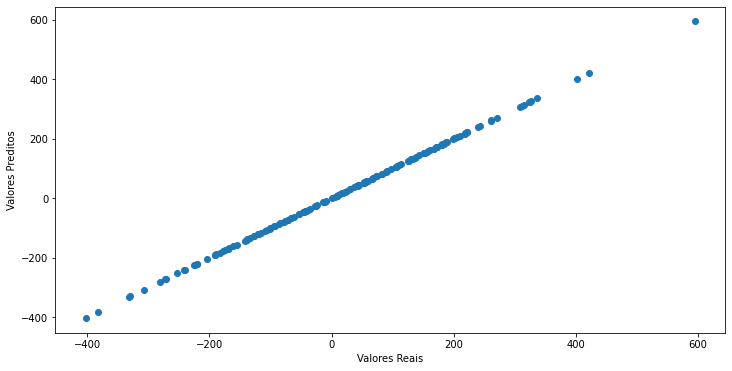

In [93]:
#aderencia entre o predito e treino, eixo x é o valor efetivo de votos e eixo Y o resultado dos testes
plt.figure(figsize=(12,6))
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.scatter(y_test, predict)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


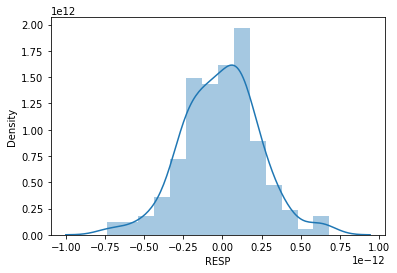

In [94]:
#distribuição normal do votos, o modelo tem um grande desvio padrão
sns.distplot((y_test-predict))


In [95]:
##média de erro do modelo na predição de votos, quanto o modelo erra, ele erra em 1191 votos.
print('MAE', metrics.mean_absolute_error(y_test, predict))

MAE 1.8814848668956653e-13


In [96]:
##média de erro do modelo na predição de votos, quanto o modelo erra, ele erra em 1191 votos.
print('MSE', metrics.mean_squared_error(y_test, predict))

MSE 5.767076653852383e-26


In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)

X = scaler.transform(x).reshape(1,-1) 

#letra A

**Vencedor**

Letra - A


**PLN - 10 pts**

Letra E - Term Frequência - Este é o método de frequência dos termos, ingnorando informações semânticas. 

**Árvores - 10 pts**

Falso. A árvore de Decisão é um tipo de algoritmo de aprendizagem de máquina supervisionado que se baseia na ideia de divisão dos dados em grupos homogêneos, podem ser utilizadas em um cenário de classificação ou regressão. Aceita tanto dados categóricos quanto numéricos diminuindo a necessidade da limpeza de dados em comparação com outros modelos.